# PragmaticLM
>Notebook 1

Analysing T5-base architecture

In [2]:
import os
import numpy as np
import transformers
from transformers import (AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, TrainingArguments, Trainer, DataCollatorForLanguageModeling, pipeline)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Load model from HF transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [5]:
print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [6]:
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

Total parameters: 222,903,552
Trainable parameters: 222,903,552


In [7]:
print(model.config)

T5Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "google-t5/t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "e

In [8]:
text = "translate English to German: The house is wonderful."

inputs = tokenizer(text, return_tensors="pt")
print("Tokenized input IDs:")
print(inputs.input_ids)

Tokenized input IDs:
tensor([[13959,  1566,    12,  2968,    10,    37,   629,    19,  1627,     5,
             1]])


In [9]:
tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])
print("Tokens:")
print(tokens)

Tokens:
['▁translate', '▁English', '▁to', '▁German', ':', '▁The', '▁house', '▁is', '▁wonderful', '.', '</s>']


In [14]:
# Generate an output to see the format
outputs = model.generate(inputs.input_ids)
decoded_outputs = tokenizer.decode(outputs[0], skip_special_tokens=True)
print('Output Token Ids:')
print(outputs[0])
tokens = tokenizer.convert_ids_to_tokens(outputs[0])
print("Tokens:")
print(tokens)
print("Model output:")
print(decoded_outputs)

Output Token Ids:
tensor([    0,   644,  4598,   229, 19250,     5,     1])
Tokens:
['<pad>', '▁Das', '▁Haus', '▁ist', '▁wunderbar', '.', '</s>']
Model output:
Das Haus ist wunderbar.


In [15]:
#special tokens
print("Special tokens:")
print(f"BOS token: {tokenizer.bos_token}, ID: {tokenizer.bos_token_id}")
print(f"EOS token: {tokenizer.eos_token}, ID: {tokenizer.eos_token_id}")
print(f"PAD token: {tokenizer.pad_token}, ID: {tokenizer.pad_token_id}")

Special tokens:
BOS token: None, ID: None
EOS token: </s>, ID: 1
PAD token: <pad>, ID: 0


In [16]:
print("Encoder structure:")
print(model.encoder)
print("\nDecoder structure:")
print(model.decoder)

Encoder structure:
T5Stack(
  (embed_tokens): Embedding(32128, 768)
  (block): ModuleList(
    (0): T5Block(
      (layer): ModuleList(
        (0): T5LayerSelfAttention(
          (SelfAttention): T5Attention(
            (q): Linear(in_features=768, out_features=768, bias=False)
            (k): Linear(in_features=768, out_features=768, bias=False)
            (v): Linear(in_features=768, out_features=768, bias=False)
            (o): Linear(in_features=768, out_features=768, bias=False)
            (relative_attention_bias): Embedding(32, 12)
          )
          (layer_norm): T5LayerNorm()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (1): T5LayerFF(
          (DenseReluDense): T5DenseActDense(
            (wi): Linear(in_features=768, out_features=3072, bias=False)
            (wo): Linear(in_features=3072, out_features=768, bias=False)
            (dropout): Dropout(p=0.1, inplace=False)
            (act): ReLU()
          )
          (layer_norm): T5Layer

In [17]:
print(f"Number of encoder layers: {len(model.encoder.block)}")
print(f"Number of decoder layers: {len(model.decoder.block)}")

Number of encoder layers: 12
Number of decoder layers: 12


In [18]:
# Examining a specific encoder layer
print("\nStructure of first encoder layer:")
print(model.encoder.block[0])


Structure of first encoder layer:
T5Block(
  (layer): ModuleList(
    (0): T5LayerSelfAttention(
      (SelfAttention): T5Attention(
        (q): Linear(in_features=768, out_features=768, bias=False)
        (k): Linear(in_features=768, out_features=768, bias=False)
        (v): Linear(in_features=768, out_features=768, bias=False)
        (o): Linear(in_features=768, out_features=768, bias=False)
        (relative_attention_bias): Embedding(32, 12)
      )
      (layer_norm): T5LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (1): T5LayerFF(
      (DenseReluDense): T5DenseActDense(
        (wi): Linear(in_features=768, out_features=3072, bias=False)
        (wo): Linear(in_features=3072, out_features=768, bias=False)
        (dropout): Dropout(p=0.1, inplace=False)
        (act): ReLU()
      )
      (layer_norm): T5LayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)


In [19]:
#Attention heads
print(f"Number of attention heads: {model.config.num_heads}")
print(f"Head size: {model.config.d_model // model.config.num_heads}")

Number of attention heads: 12
Head size: 64


In [20]:
# Function to visualize attention patterns
def process_attention(inputs, model, layer_idx=0, head_idx=0):
    outputs = model(
        input_ids=inputs.input_ids,
        decoder_input_ids=inputs.input_ids,
        output_attentions=True
    )

    encoder_attentions = outputs.encoder_attentions
    encoder_attention = encoder_attentions[layer_idx][0, head_idx].detach().numpy()

    return encoder_attention

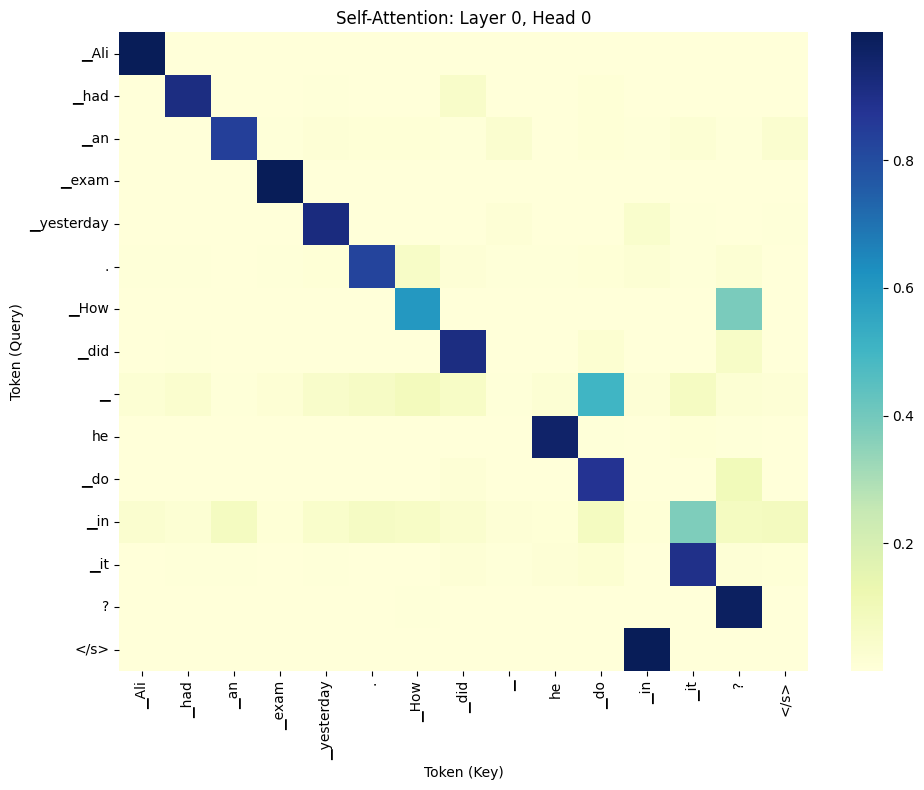

In [34]:
text = "Ali had an exam yesterday. How did he do in it?"
inputs = tokenizer(text, return_tensors="pt")
tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])

attention_matrix = process_attention(inputs, model)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="YlGnBu")
plt.title("Self-Attention: Layer 0, Head 0")
plt.xlabel("Token (Key)")
plt.ylabel("Token (Query)")
plt.tight_layout()
plt.show()

In [27]:
# Function to extract intermediate layer representations
def get_layer_representations(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt")

    encoder_outputs = model.encoder(
        inputs.input_ids,
        output_hidden_states=True,
        return_dict=True
    )

    hidden_states = encoder_outputs.hidden_states

    return {
        'input_ids': inputs.input_ids,
        'tokens': tokenizer.convert_ids_to_tokens(inputs.input_ids[0]),
        'embedding': hidden_states[0].detach(),
        'final_hidden': hidden_states[-1].detach(),
        'all_hidden_states': [h.detach() for h in hidden_states]
    }

In [31]:
text = "summarize: The T5 model is a transformer-based model that was pre-trained on a mixture of tasks."
representations = get_layer_representations(text, model, tokenizer)

print(f"Embedding dimension: {representations['embedding'].shape}")
print(f"Number of encoder layers outputs: {len(representations['all_hidden_states'])}")

token_idx = 9

token = representations['tokens'][token_idx]
print(f"Analyzing representations for token: '{token}'")

Embedding dimension: torch.Size([1, 27, 768])
Number of encoder layers outputs: 13
Analyzing representations for token: '▁transformer'


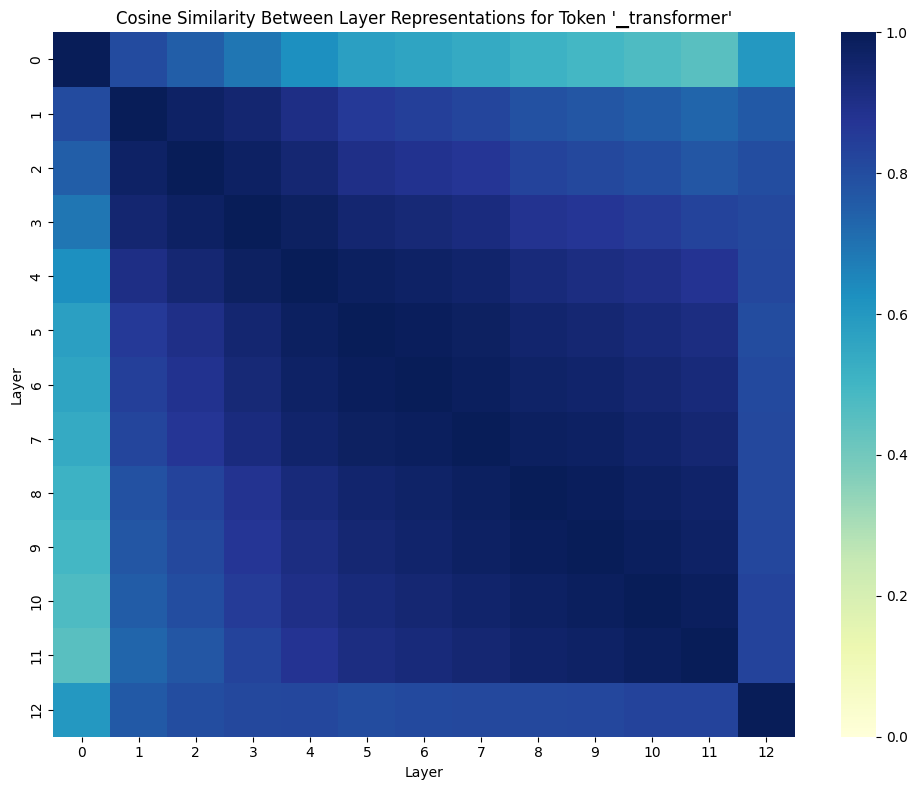

In [32]:
token_embeddings = [h[0, token_idx] for h in representations['all_hidden_states']]

# Calculate the cosine similarity between layers
from sklearn.metrics.pairwise import cosine_similarity
embeddings_array = np.array([e.numpy() for e in token_embeddings])
similarities = cosine_similarity(embeddings_array)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, cmap="YlGnBu", vmin=0, vmax=1)
plt.title(f"Cosine Similarity Between Layer Representations for Token '{token}'")
plt.xlabel("Layer")
plt.ylabel("Layer")
plt.tight_layout()
plt.show()

In [35]:
# Feed-forward network in the first encoder layer
ff_network = model.encoder.block[0].layer[1].DenseReluDense

print("Feed-Forward Network structure:")
print(ff_network)
print(f"Input dimension: {model.config.d_model}")
print(f"Intermediate dimension: {model.config.d_ff}")
print(f"Output dimension: {model.config.d_model}")

# Analyze activation function and dropout
print(f"Activation function: {model.config.feed_forward_proj}")
print(f"Dropout rate: {model.config.dropout_rate}")

Feed-Forward Network structure:
T5DenseActDense(
  (wi): Linear(in_features=768, out_features=3072, bias=False)
  (wo): Linear(in_features=3072, out_features=768, bias=False)
  (dropout): Dropout(p=0.1, inplace=False)
  (act): ReLU()
)
Input dimension: 768
Intermediate dimension: 3072
Output dimension: 768
Activation function: relu
Dropout rate: 0.1
